# Decision Tree

Objective: Predicted Attribute: Localization site of protein. ( non-numeric ).   
Dataset: yeast.data  
Ref: NA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("yeast.data", delim_whitespace=True, header=None)
print('Dataset size', data.shape)
data.head()

Dataset size (1484, 10)


,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [2]:
data.columns = ['seqName','mcG','gvh','alm','mit','mit2','erl','pox','vacScore','nucScore']
data.head()

,seqName,mcG,gvh,alm,mit,mit2,erl,pox,vacScore,nucScore
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


## Data Exploration

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: nucScore, dtype: int64


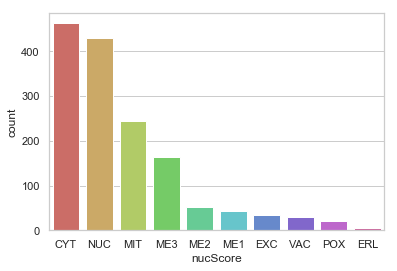

In [3]:
print(data['nucScore'].value_counts())

sns.countplot(x='nucScore',data = data, palette='hls',order = data['nucScore'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [4]:
data["nucScore"] = data["nucScore"].astype('category')
data["nucScoreCat"] = data["nucScore"].cat.codes
data.head()

,seqName,mcG,gvh,alm,mit,mit2,erl,pox,vacScore,nucScore,nucScoreCat
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT,6
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT,6
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT,6
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC,7
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT,6


0    463
7    429
6    244
5    163
4     51
3     44
2     35
9     30
8     20
1      5
Name: nucScoreCat, dtype: int64


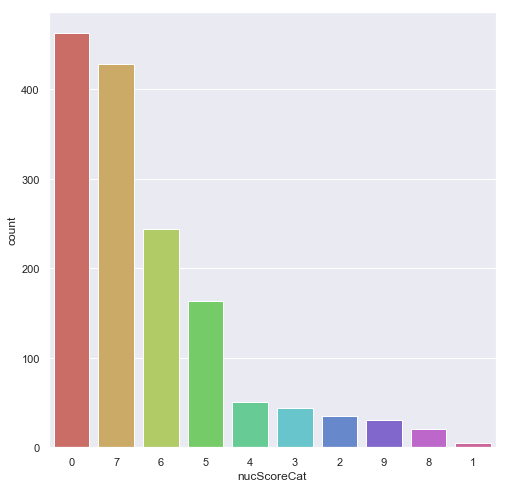

In [5]:
print(data['nucScoreCat'].value_counts())

sns.countplot(x='nucScoreCat',data = data, palette='hls',order = data['nucScoreCat'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

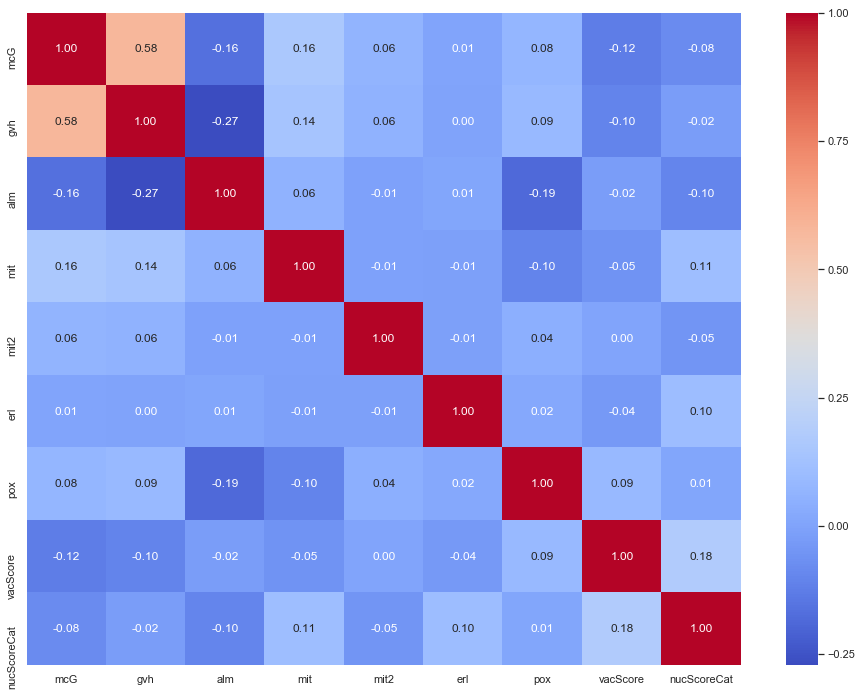

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [7]:
corr_rank = data.corr()
corr_rank["nucScoreCat"].sort_values(ascending=False)

nucScoreCat    1.000000
vacScore       0.178026
mit            0.109051
erl            0.102067
pox            0.007111
gvh           -0.020542
mit2          -0.052257
mcG           -0.082527
alm           -0.102315
Name: nucScoreCat, dtype: float64

## Data Processing and Selection

In [8]:
X = data[['vacScore','mit','erl','pox','gvh','mit2','mcG','alm']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1484, 8)


array([[0.22, 0.13, 0.  , 0.48, 0.61, 0.5 , 0.58, 0.47],
       [0.22, 0.27, 0.  , 0.53, 0.67, 0.5 , 0.43, 0.48]])

In [9]:
y = data["nucScoreCat"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (1484,)


0    6
1    6
2    6
3    7
4    6
Name: nucScoreCat, dtype: int8

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y,test_size=0.3,random_state=3)

print("X TRAIN Set: ", X_trainset.shape, y_trainset.shape)
print("X TEST Set : ", X_testset.shape, y_testset.shape)

X TRAIN Set:  (1038, 8) (1038,)
X TEST Set :  (446, 8) (446,)


## Decision Tree

In [11]:
#specify criterion='entropy' see information gain of each node (using gini given same result)
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#fit with data
DTree.fit(X_trainset, y_trainset)

#making prediction and store in predTree
predTree = DTree.predict(X_testset)
print(predTree.shape)
predTree

(446,)


array([0, 5, 7, 0, 5, 0, 0, 6, 7, 7, 0, 0, 6, 0, 5, 6, 6, 7, 5, 7, 7, 7,
       7, 0, 5, 3, 6, 0, 7, 5, 0, 0, 4, 5, 7, 6, 0, 0, 5, 5, 7, 7, 7, 4,
       6, 0, 6, 6, 4, 0, 0, 7, 6, 5, 0, 2, 0, 5, 0, 7, 6, 0, 5, 7, 7, 6,
       0, 3, 0, 7, 7, 5, 0, 5, 0, 0, 7, 0, 0, 6, 7, 6, 7, 7, 4, 7, 3, 5,
       0, 5, 7, 6, 4, 5, 6, 6, 0, 2, 7, 6, 7, 6, 7, 7, 0, 7, 0, 0, 0, 0,
       0, 0, 7, 6, 7, 0, 0, 0, 7, 7, 0, 6, 0, 0, 0, 7, 5, 7, 6, 7, 0, 0,
       5, 6, 0, 4, 6, 7, 6, 7, 0, 2, 3, 7, 0, 0, 7, 6, 0, 7, 0, 7, 5, 7,
       6, 0, 6, 6, 0, 7, 0, 0, 6, 0, 0, 0, 0, 5, 7, 7, 7, 3, 7, 5, 7, 0,
       7, 0, 0, 0, 5, 6, 0, 4, 0, 7, 7, 4, 7, 0, 0, 6, 7, 6, 7, 7, 6, 3,
       0, 0, 0, 3, 7, 7, 7, 5, 0, 7, 7, 5, 0, 0, 5, 0, 0, 7, 0, 7, 0, 7,
       7, 5, 5, 4, 0, 4, 7, 5, 5, 5, 6, 6, 6, 7, 0, 0, 5, 0, 0, 0, 7, 0,
       7, 0, 0, 0, 2, 6, 0, 0, 0, 7, 7, 7, 7, 5, 5, 0, 5, 7, 5, 0, 0, 4,
       5, 0, 6, 6, 0, 7, 7, 7, 0, 0, 7, 4, 0, 7, 4, 0, 5, 0, 0, 7, 7, 0,
       0, 5, 7, 6, 7, 7, 0, 0, 7, 0, 7, 7, 0, 7, 3,

In [12]:
#calculate model accuracy
from sklearn import metrics
print("Decision Tree's Accuracy: ", round(metrics.accuracy_score(y_testset, predTree),5))
print("Accuracy score 2        : ", round(DTree.score(X_testset, y_testset),5))

Decision Tree's Accuracy:  0.59193
Accuracy score 2        :  0.59193
